In [2]:
%matplotlib inline 
import jetnet
import torch
import numpy
import matplotlib.pyplot as plot
import pandas as pd
# %%
import jetnet
import numpy as np
import matplotlib.pyplot as plt
import torch
from pathlib import Path
import os

plt.rcParams['figure.dpi'] = 150

In [17]:


qmine = pd.read_csv(os.environ["HOME"] + "/JetNet_NF/train_q_jets.csv",header=None,sep=" ")
gmine = pd.read_csv(os.environ["HOME"] + "/JetNet_NF/train_g_jets.csv",header=None,sep=" ")
tmine = pd.read_csv(os.environ["HOME"] + "/JetNet_NF/train_t_jets.csv",header=None,sep=" ")

q=pd.read_csv("q_jets.csv",header=None,sep=" ")
t=pd.read_csv("t_jets.csv",header=None,sep=" ")
g=pd.read_csv("g_jets.csv",header=None,sep=" ")
q=q.values.reshape(-1,30,4)
g=g.values.reshape(-1,30,4)
t=t.values.reshape(-1,30,4)
qmine=qmine.values.reshape(-1,30,4)
gmine=gmine.values.reshape(-1,30,4)
tmine=tmine.values.reshape(-1,30,4)


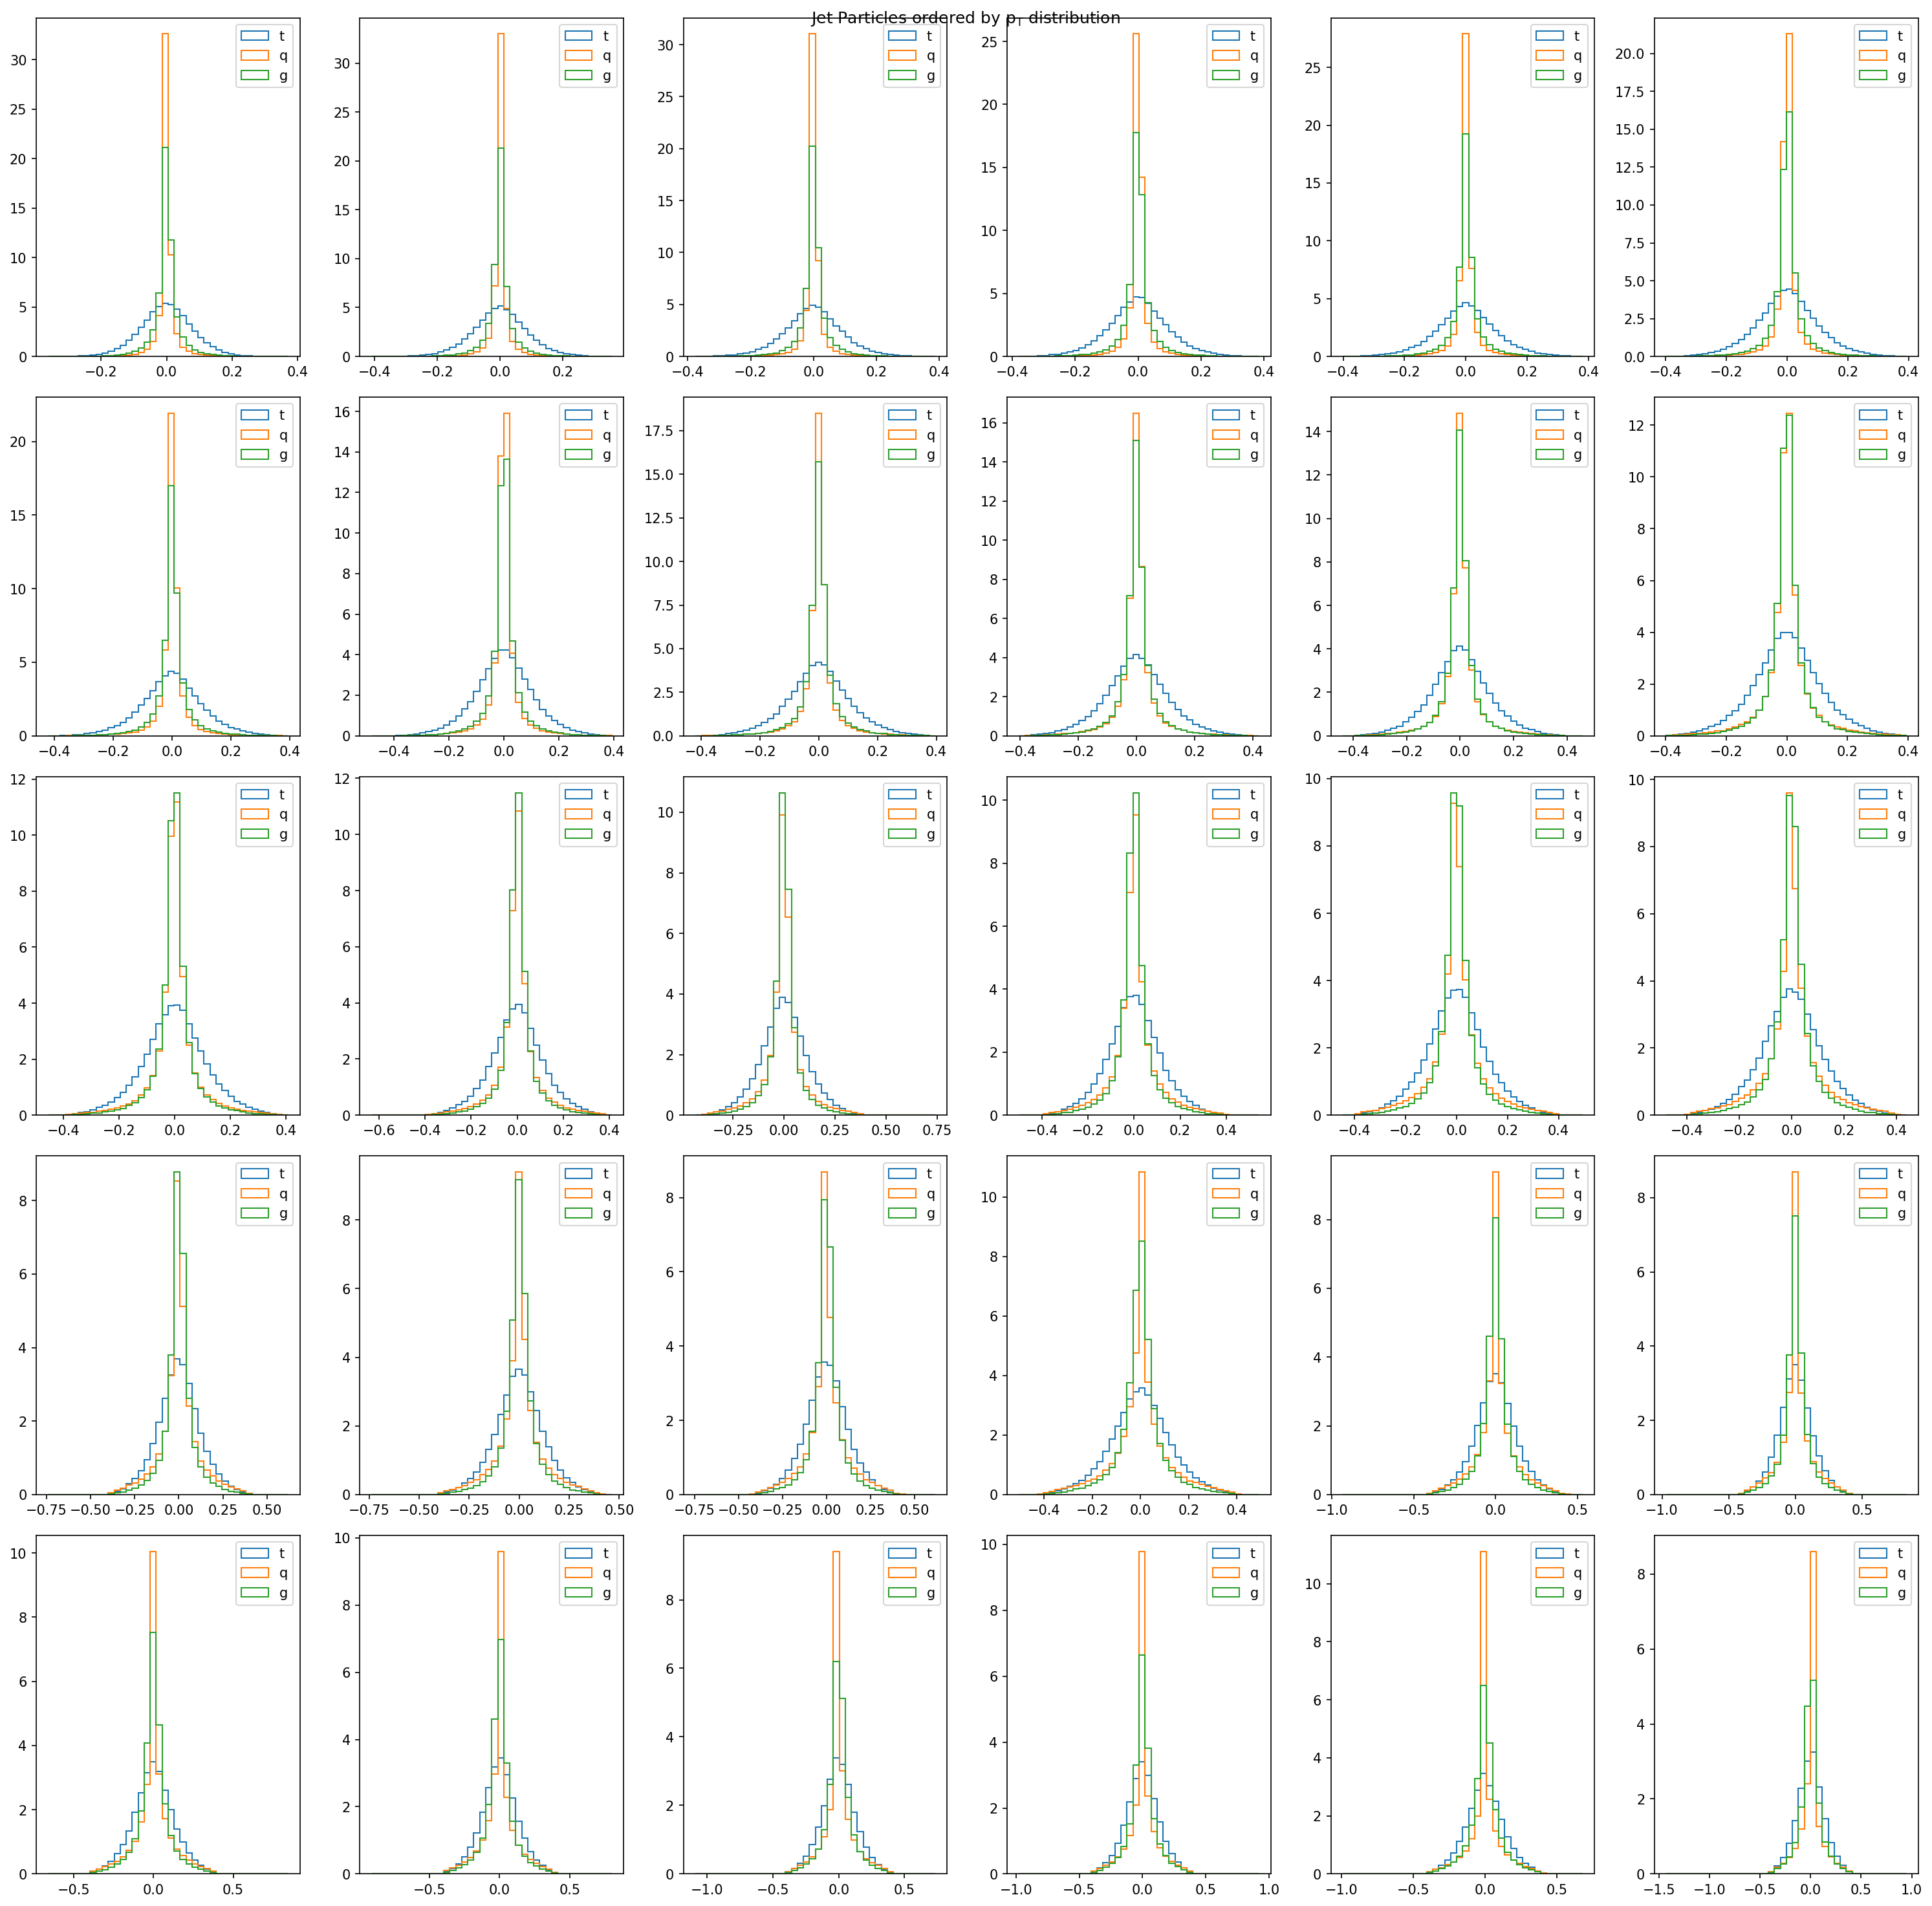

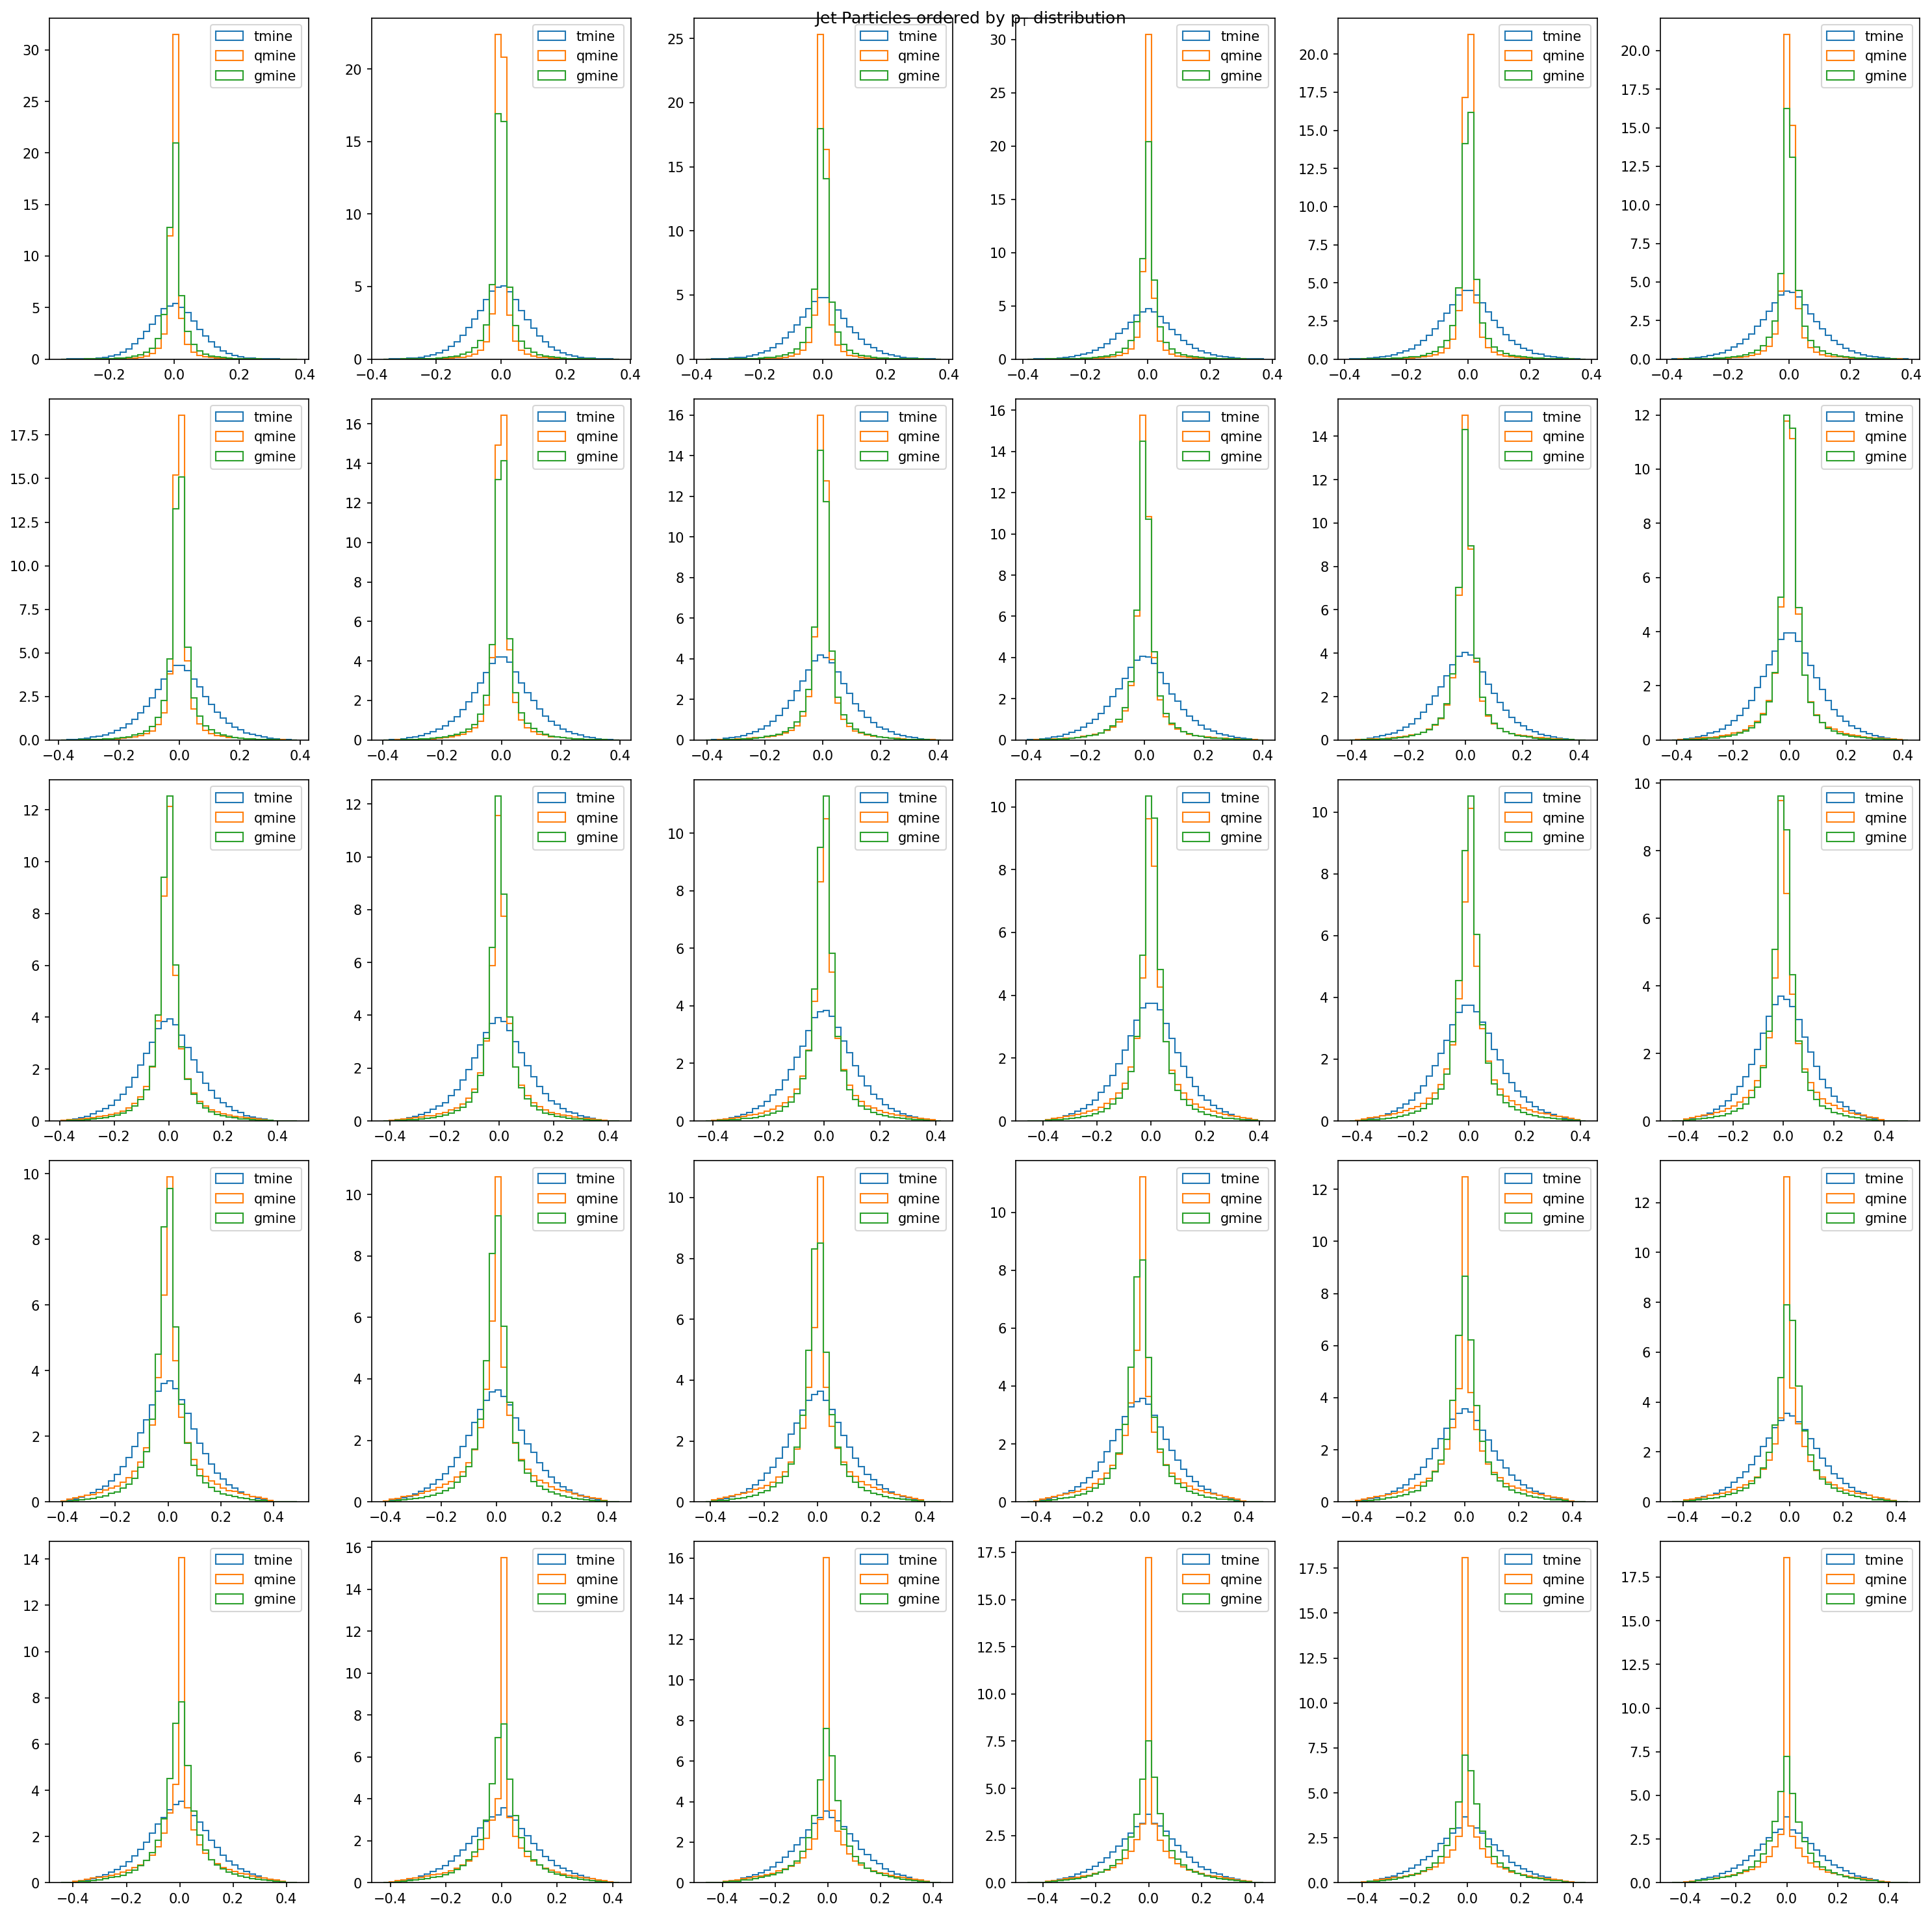

In [20]:

fig,ax=plt.subplots(5,6,figsize=(20,20))

for i in range(30):
    _,bins,_=ax[i//6,i%6].hist(t[:,i,0],bins=40,label="t",histtype="step",density=1)
    ax[i//6,i%6].hist(q[:,i,0],bins=bins,label="q",histtype="step",density=1)
    ax[i//6,i%6].hist(g[:,i,0],bins=bins,label="g",histtype="step",density=1)
    ax[i//6,i%6].legend()
    #ax[i//6,i%6].set_yscale("log")
plt.suptitle(r"Jet Particles ordered by $p_T$ distribution")
plt.tight_layout()
plt.show()

fig,ax=plt.subplots(5,6,figsize=(20,20))
for i in range(30):
    _,bins,_=ax[i//6,i%6].hist(tmine[:,i,1],bins=40,label="tmine",histtype="step",density=1)
    ax[i//6,i%6].hist(qmine[:,i,1],bins=bins,label="qmine",histtype="step",density=1)
    ax[i//6,i%6].hist(gmine[:,i,1],bins=bins,label="gmine",histtype="step",density=1)
    ax[i//6,i%6].legend()
    #ax[i//6,i%6].set_yscale("log")
plt.suptitle(r"Jet Particles ordered by $p_T$ distribution")
plt.tight_layout()
plt.show()



In [24]:
python=torch.ones(10)+torch.cat((torch.ones(6),torch.zeros(10-6)),axis=0)
python

tensor([2., 2., 2., 2., 2., 2., 1., 1., 1., 1.])

In [8]:
def scale(x,m,config,data_module): 
        x = x.reshape(len(x),30,3)
        # self.data_module.scaler = self.data_module.scaler.to(x.device)
        for i in range(30):
            if config["quantile"]:
                x[~m[:,i] ,i, 2] = torch.tensor(data_module.ptscalers[i].inverse_transform(x[~m[:,i] ,i, 2].numpy().reshape(-1,1)).reshape(-1)).to(x.device)
                x[~m[:,i] ,i, :2] = data_module.scalers[i].inverse_transform(x[~m[:,i] ,i, :2].float())
            else:
                x[~m[:,i],i,:]= data_module.scalers[i].inverse_transform(x[~m[:,i],i,:])
        return x

from jetnet_dataloader import JetNetDataloader
config={"batch_size":1024,"quantile":True,"limit":-1,"n_dim":3,"n_part":30}
config["parton"]="q"
data_module_q=JetNetDataloader(config)
data_module_q.setup("validation")
config["parton"]="t"
data_module_t=JetNetDataloader(config)
data_module_t.setup("validation")
config["parton"]="g"
data_module_g=JetNetDataloader(config)
data_module_g.setup("validation")

t=data_module_t.data[:,:90].reshape(-1,30,3)
mask_t=data_module_t.data[:,90:].bool()
t=scale(t,mask_t,config,data_module_t)
q=data_module_q.data[:,:90].reshape(-1,30,3)
mask_q=data_module_q.data[:,90:].bool()
q=scale(q,mask_q,config,data_module_q)
g=data_module_g.data[:,:90].reshape(-1,30,3)
mask_g=data_module_g.data[:,90:].bool()
g=scale(g,mask_g,config,data_module_g)
# q = torch.tensor(pd.read_csv(os.environ["HOME"] + "/JetNet_NF/train_q_jets.csv",header=None,sep=" ").values.astype(float)).reshape(-1,30,4)

#q=torch.tensor(pd.read_csv("q_jets_old.csv",header=None,sep=" ").values.astype(float)).reshape(-1,30,4)
#t=torch.tensor(pd.read_csv("t_jets_old.csv",header=None,sep=" ").values.astype(float)).reshape(-1,30,4)
#g=torch.tensor(pd.read_csv("g_jets_old.csv",header=None,sep=" ").values.astype(float)).reshape(-1,30,4)
fig,ax=plt.subplots(5,6,figsize=(20,20))
for i in range(30):
    _,bins,_=ax[i//6,i%6].hist(t[:,i,2].numpy(),bins=40,label="t",histtype="step",density=1)
    ax[i//6,i%6].hist(q[:,i,2].numpy(),bins=bins,label="q",histtype="step",density=1)
    ax[i//6,i%6].hist(g[:,i,2].numpy(),bins=bins,label="g",histtype="step",density=1)
    ax[i//6,i%6].legend()
    #ax[i//6,i%6].set_yscale("log")
plt.suptitle(r"Jet Particles ordered by $p_T$ distribution")
plt.tight_layout()


NameError: name 'model' is not defined

In [15]:
from jetnet_dataloader import JetNetDataloader
from lit_nf import TransGan
config = {
        "context_features": 1,
        "network_layers_nf": 2,
        "network_nodes_nf": 256,
        "batch_size": 1024,#1024 best
        "coupling_layers": 15,
        "lr": 0.001,
        "batchnorm": True,
        "bins": 5,
        "tail_bound": 6,
        "limit": 200000,
        "n_dim": 3,
        "dropout": 0.2,
        "canonical": False,
        "max_steps": 100000,
        "lambda": 100,
        "name": "Transflow_lasttry",
        "disc": False,
        "parton": "q",
        "wgan": False,
        "num_layers": 4,
        "freq": 6,
        "n_part": 30,
        "fc": False,
        "hidden": 500,
        "heads": 5,
        "l_dim": 25,
        "lr_g": 0.0004327405312571664,
        "lr_d": 0.0004327405312571664,
        "lr_nf": 0.000722,
        "sched": "cosine",
        "opt": "Adam",
        "max_epochs": 1600,
        "mass": True,
        "no_hidden": False,
        "clf": True,
        "val_check": 25,
        "frac_pretrain": 40,
        "seed": 69,
        "quantile": True,
        "norm":True
    }
model=TransGan(config,hyperopt=False,num_batches=100)

config["parton"]="q"
data_module_q=JetNetDataloader(config)
data_module_q.setup("validation")
config["parton"]="t"
data_module_t=JetNetDataloader(config)
data_module_t.setup("validation")
config["parton"]="g"
data_module_g=JetNetDataloader(config)
data_module_g.setup("validation")

model.n_dim=3
t=data_module_t.data[:,:90].reshape(-1,30,3)
mask_t=data_module_t.data[:,90:].bool()
t=model.scale(t,mask_t)
q=data_module_q.data[:,:90].reshape(-1,30,3)
mask_q=data_module_q.data[:,90:].bool()
q=model.scale(q,mask_q)
g=data_module_g.data[:,:90].reshape(-1,30,3)
mask_g=data_module_g.data[:,90:].bool()
g=model.scale(g,mask_g)
q = torch.tensor(pd.read_csv(os.environ["HOME"] + "/JetNet_NF/train_q_jets.csv",header=None,sep=" ").values.astype(float)).reshape(-1,30,4)

#q=torch.tensor(pd.read_csv("q_jets_old.csv",header=None,sep=" ").values.astype(float)).reshape(-1,30,4)
#t=torch.tensor(pd.read_csv("t_jets_old.csv",header=None,sep=" ").values.astype(float)).reshape(-1,30,4)
#g=torch.tensor(pd.read_csv("g_jets_old.csv",header=None,sep=" ").values.astype(float)).reshape(-1,30,4)
fig,ax=plt.subplots(5,6,figsize=(20,20))
for i in range(30):
    _,bins,_=ax[i//6,i%6].hist(t[:,i,2].numpy(),bins=40,label="t",histtype="step",density=1)
    ax[i//6,i%6].hist(q[:,i,2].numpy(),bins=bins,label="q",histtype="step",density=1)
    ax[i//6,i%6].hist(g[:,i,2].numpy(),bins=bins,label="g",histtype="step",density=1)
    ax[i//6,i%6].legend()
    #ax[i//6,i%6].set_yscale("log")
plt.suptitle(r"Jet Particles ordered by $p_T$ distribution")
plt.tight_layout()

AttributeError: 'TransGan' object has no attribute 'data_module'